# According to LLD format

In [2]:
### Read data from csv
import pandas as pd
day = pd.read_csv('data/day.csv')

### cheack whether the data loaded properly or not using head and tail() function.
day.head() 

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
day.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

# 4. Data Profiling

In [5]:
# number of rows and columns in the dataframe
day.shape

(731, 16)

In [6]:
### no.of missing values and there percentage 
day.isnull().sum().mean()

0.0

In [7]:
### no.of misinng values and there percentage per column 
day.isnull().sum()/day.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# column names
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# checking the categorical column and their list
print(day['season'].unique())
print(day['yr'].unique())
print(day['holiday'].unique())
print(day['workingday'].unique())
print( day['weathersit'].unique())
print(day['weekday'].unique())
print(day['season'].unique())
print(day['yr'].unique())
print(day['holiday'].unique())
print(day['workingday'].unique())

[1 2 3 4]
[0 1]
[0 1]
[0 1]
[2 1 3]
[6 0 1 2 3 4 5]
[1 2 3 4]
[0 1]
[0 1]
[0 1]


In [10]:
# number of duplicate rows in columns
day.pivot_table(index=['season', 'yr', 'holiday', 'workingday', 'weathersit', 'weekday'], aggfunc='size')

season  yr  holiday  workingday  weathersit  weekday
1       0   0        0           1           0          11
                                             6           9
                                 2           0           2
                                             6           5
                     1           1           1           7
                                                        ..
4       1   0        1           3           1           1
                                             2           1
            1        0           1           1           1
                                             4           1
                                 2           1           1
Length: 145, dtype: int64

In [11]:
# number of columns with zero standard deviation
day.std(axis=0)

instant        211.165812
season           1.110807
yr               0.500342
mnth             3.451913
holiday          0.167155
weekday          2.004787
workingday       0.465233
weathersit       0.544894
temp             0.183051
atemp            0.162961
hum              0.142429
windspeed        0.077498
casual         686.622488
registered    1560.256377
cnt           1937.211452
dtype: float64

In [12]:
# Size occupied in RAM columnwise
day.memory_usage(index = True) 

Index          128
instant       5848
dteday        5848
season        5848
yr            5848
mnth          5848
holiday       5848
weekday       5848
workingday    5848
weathersit    5848
temp          5848
atemp         5848
hum           5848
windspeed     5848
casual        5848
registered    5848
cnt           5848
dtype: int64

In [13]:
#Total size occupied by dataframe
day.memory_usage(index=True).sum()

93696

In [14]:
#changing column names
day = day.rename(columns={'dteday':'date','yr': 'year', 'mnth': 'month', 'temp':'temparature', 'hum':'humidity', 'cnt':'count'})

In [15]:
day.head()

instant        date  season  year  month  holiday  weekday  workingday  \
0        1  2011-01-01       1     0      1        0        6           0   
1        2  2011-01-02       1     0      1        0        0           0   
2        3  2011-01-03       1     0      1        0        1           1   
3        4  2011-01-04       1     0      1        0        2           1   
4        5  2011-01-05       1     0      1        0        3           1   

   weathersit  temparature     atemp  humidity  windspeed  casual  registered  \
0           2     0.344167  0.363625  0.805833   0.160446     331         654   
1           2     0.363478  0.353739  0.696087   0.248539     131         670   
2           1     0.196364  0.189405  0.437273   0.248309     120        1229   
3           1     0.200000  0.212122  0.590435   0.160296     108        1454   
4           1     0.226957  0.229270  0.436957   0.186900      82        1518   

   count  
0    985  
1    801  
2   1349  
3   1562  
4   1600

In [16]:
day.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temparature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [17]:
#droping the columns which have no insight in the data of instance and date columns
day= day.drop(columns=['instant', 'date'])

In [18]:
# It will explain the distributon of the data
day.describe()

season        year       month     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit  temparature       atemp    humidity   windspeed  \
count  731.000000   731.000000  731.000000  731.000000  731.000000   
mean     1.395349     0.495385    0.474354    0.627894    0.190486   
std      0.544894     0.183051    0.162961    0.142429    0.077498   
min      1.000000     0.059130    0.079070    0.000000    0.022392   
25%      1.000000     0.337083    0.337842    0.520000    0.134950   
50%      1.000000     0.498333    0.486733    0.626667    0.180975   
75%      2.000000     0.655417    0.608602    0.730209    0.233214   
max      3.000000     0.861667    0.840896    0.972500    0.507463   

            casual   registered        count  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

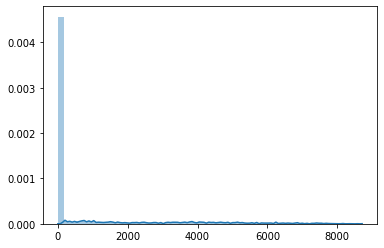

In [19]:
# let's see how data is distributed for every column
import matplotlib.pyplot as plt
import seaborn as sns     
sns.distplot(day)

# 6. Graph based EDA

# a. pair plot

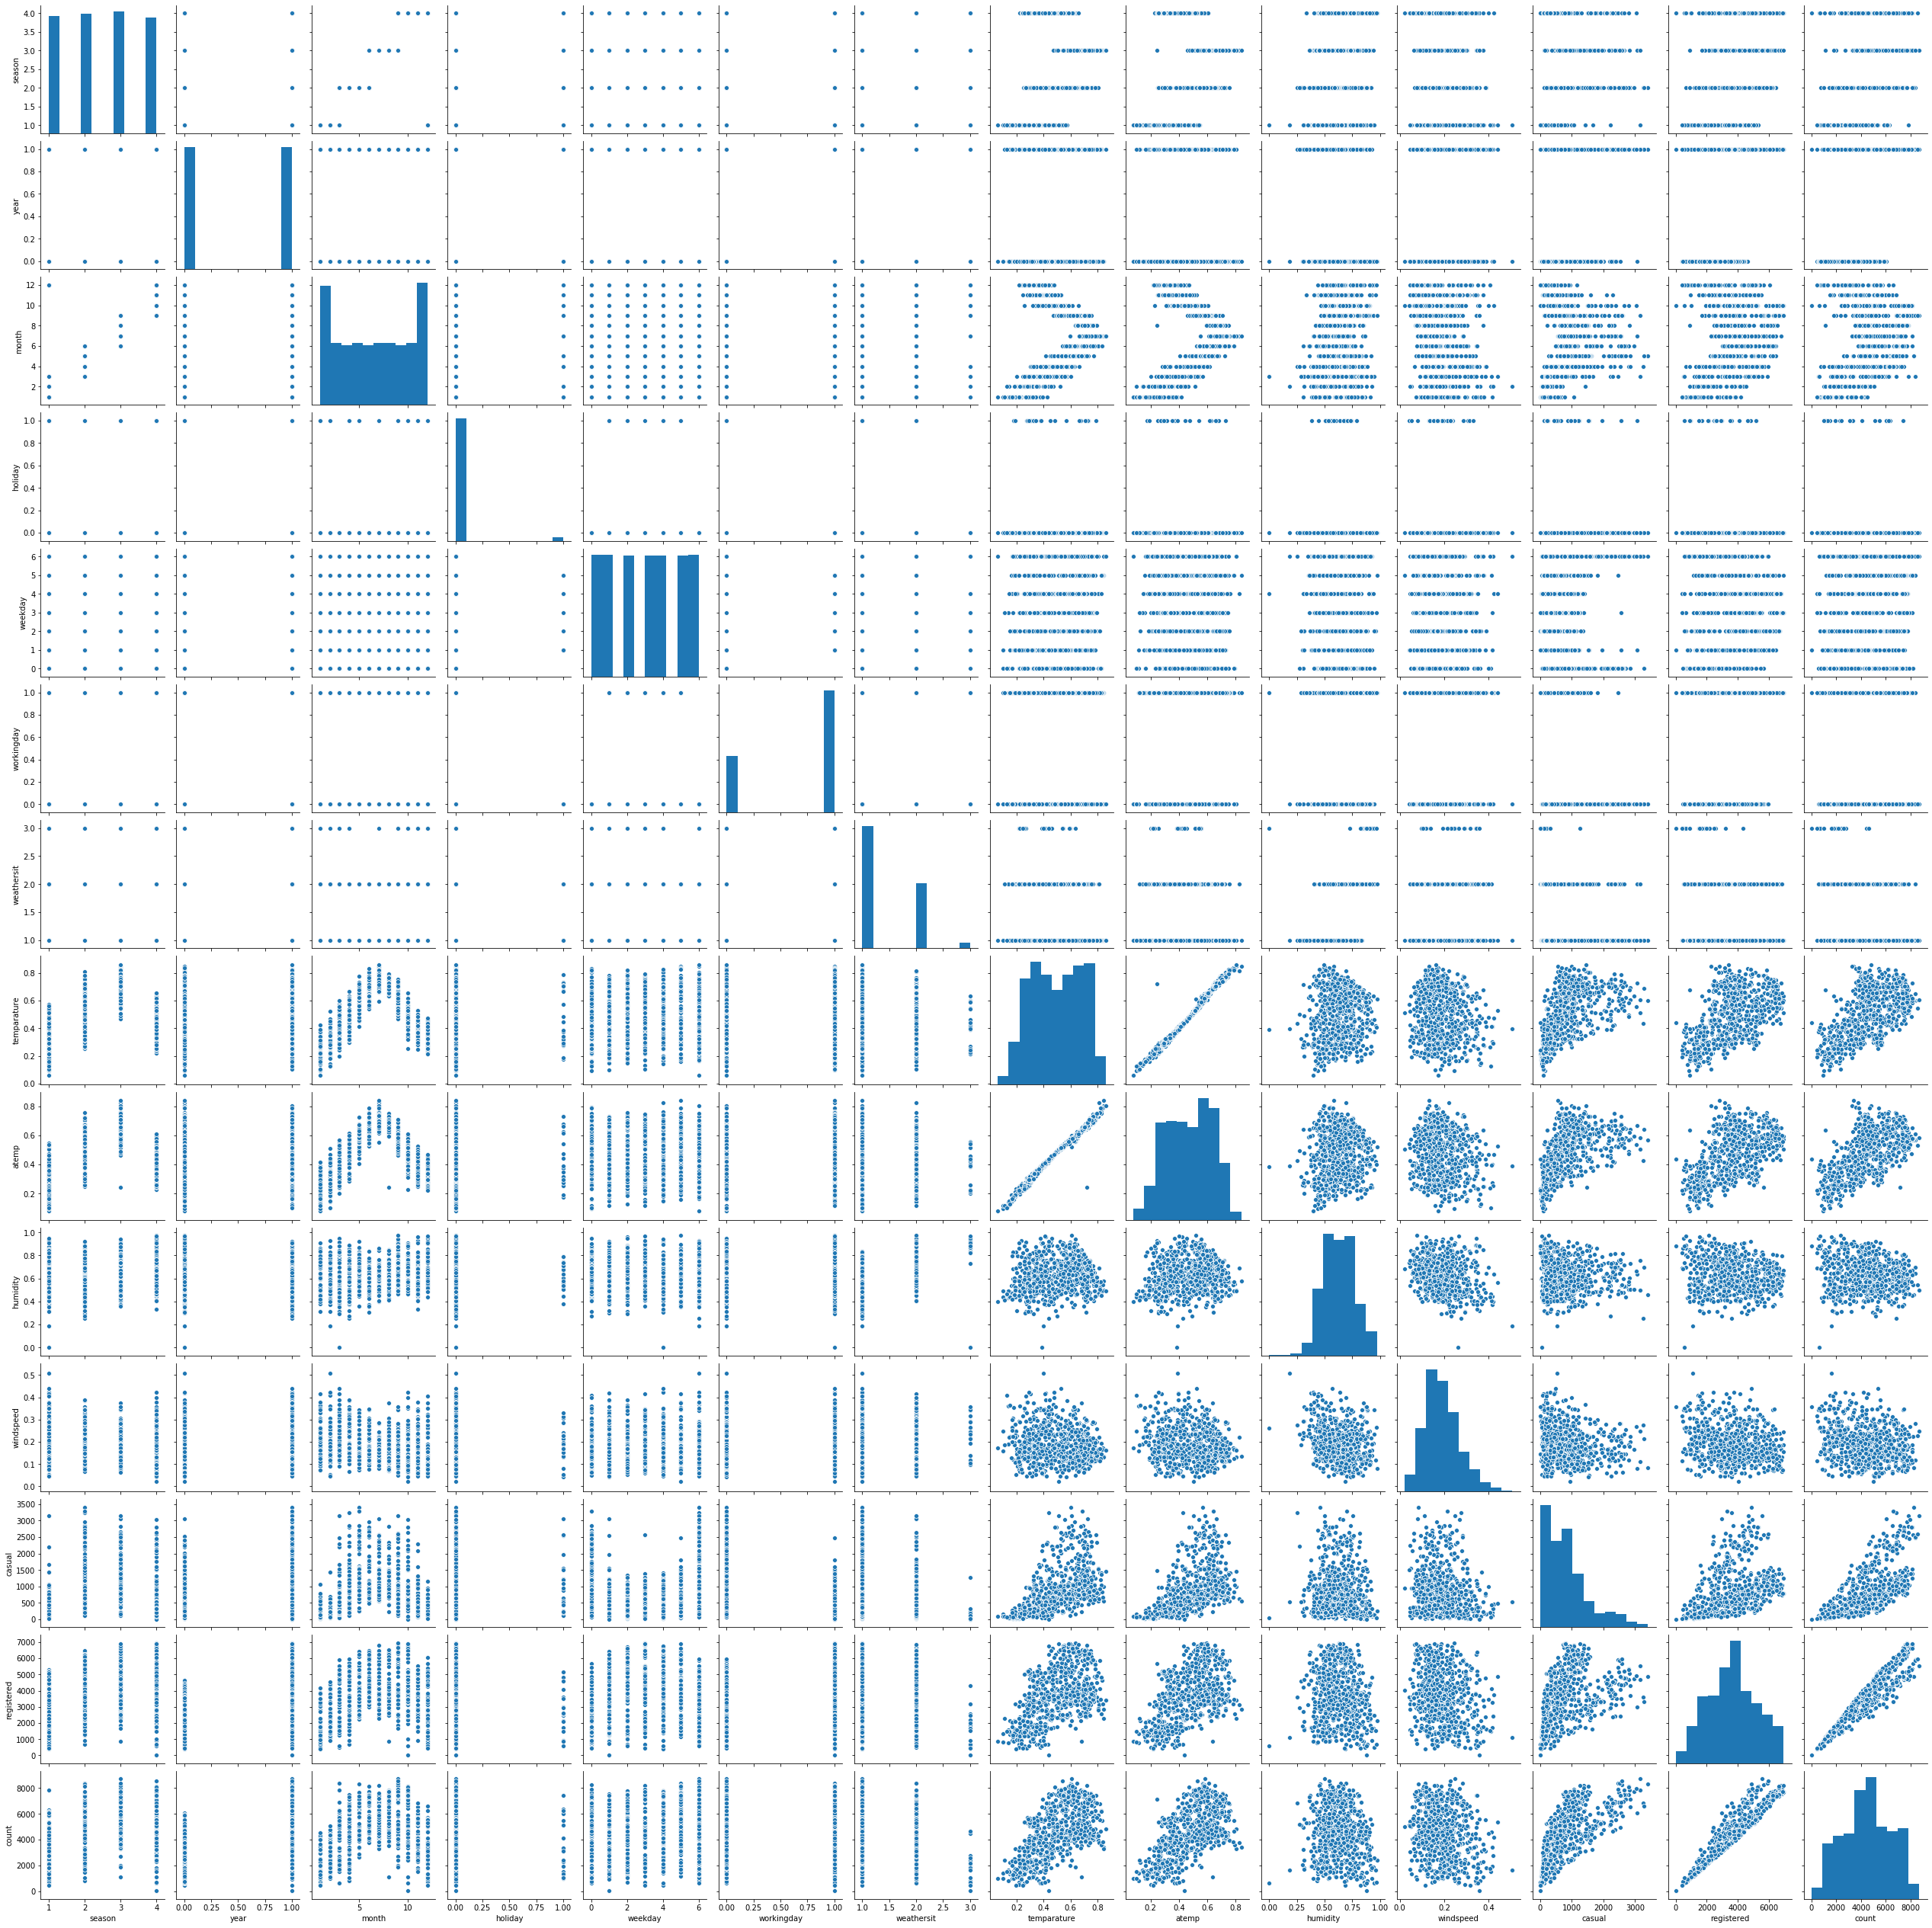

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.pairplot(day)

# b. correlation

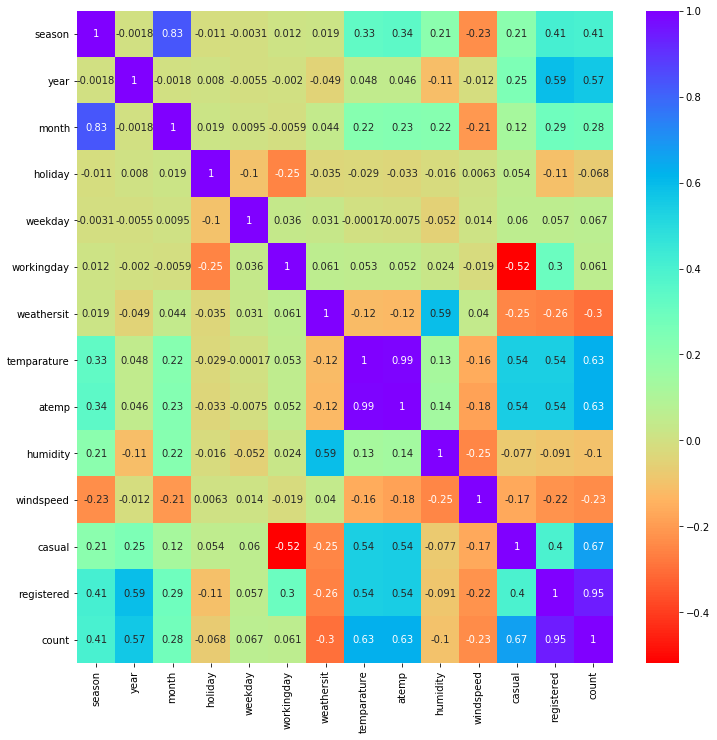

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat=day.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(12,12))
g=sns.heatmap(day[top_corr_features].corr(),annot=True,cmap="rainbow_r")

# Feature and label column separation

In [25]:
# x dataframe contain independent variables (casual and registed already given information to the count variable,
#so this two variable have no meaning for the model bbuilding)
x = day.drop(columns=['casual', 'registered', 'count', 'holiday'])

In [26]:
x.head()

season  year  month  weekday  workingday  weathersit  temparature  \
0       1     0      1        6           0           2     0.344167   
1       1     0      1        0           0           2     0.363478   
2       1     0      1        1           1           1     0.196364   
3       1     0      1        2           1           1     0.200000   
4       1     0      1        3           1           1     0.226957   

      atemp  humidity  windspeed  
0  0.363625  0.805833   0.160446  
1  0.353739  0.696087   0.248539  
2  0.189405  0.437273   0.248309  
3  0.212122  0.590435   0.160296  
4  0.229270  0.436957   0.186900

In [27]:
# dropping output variable from independant variables
y = day['count']

In [28]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: count, dtype: int64

# c. Relation plot independent vs dependent variables

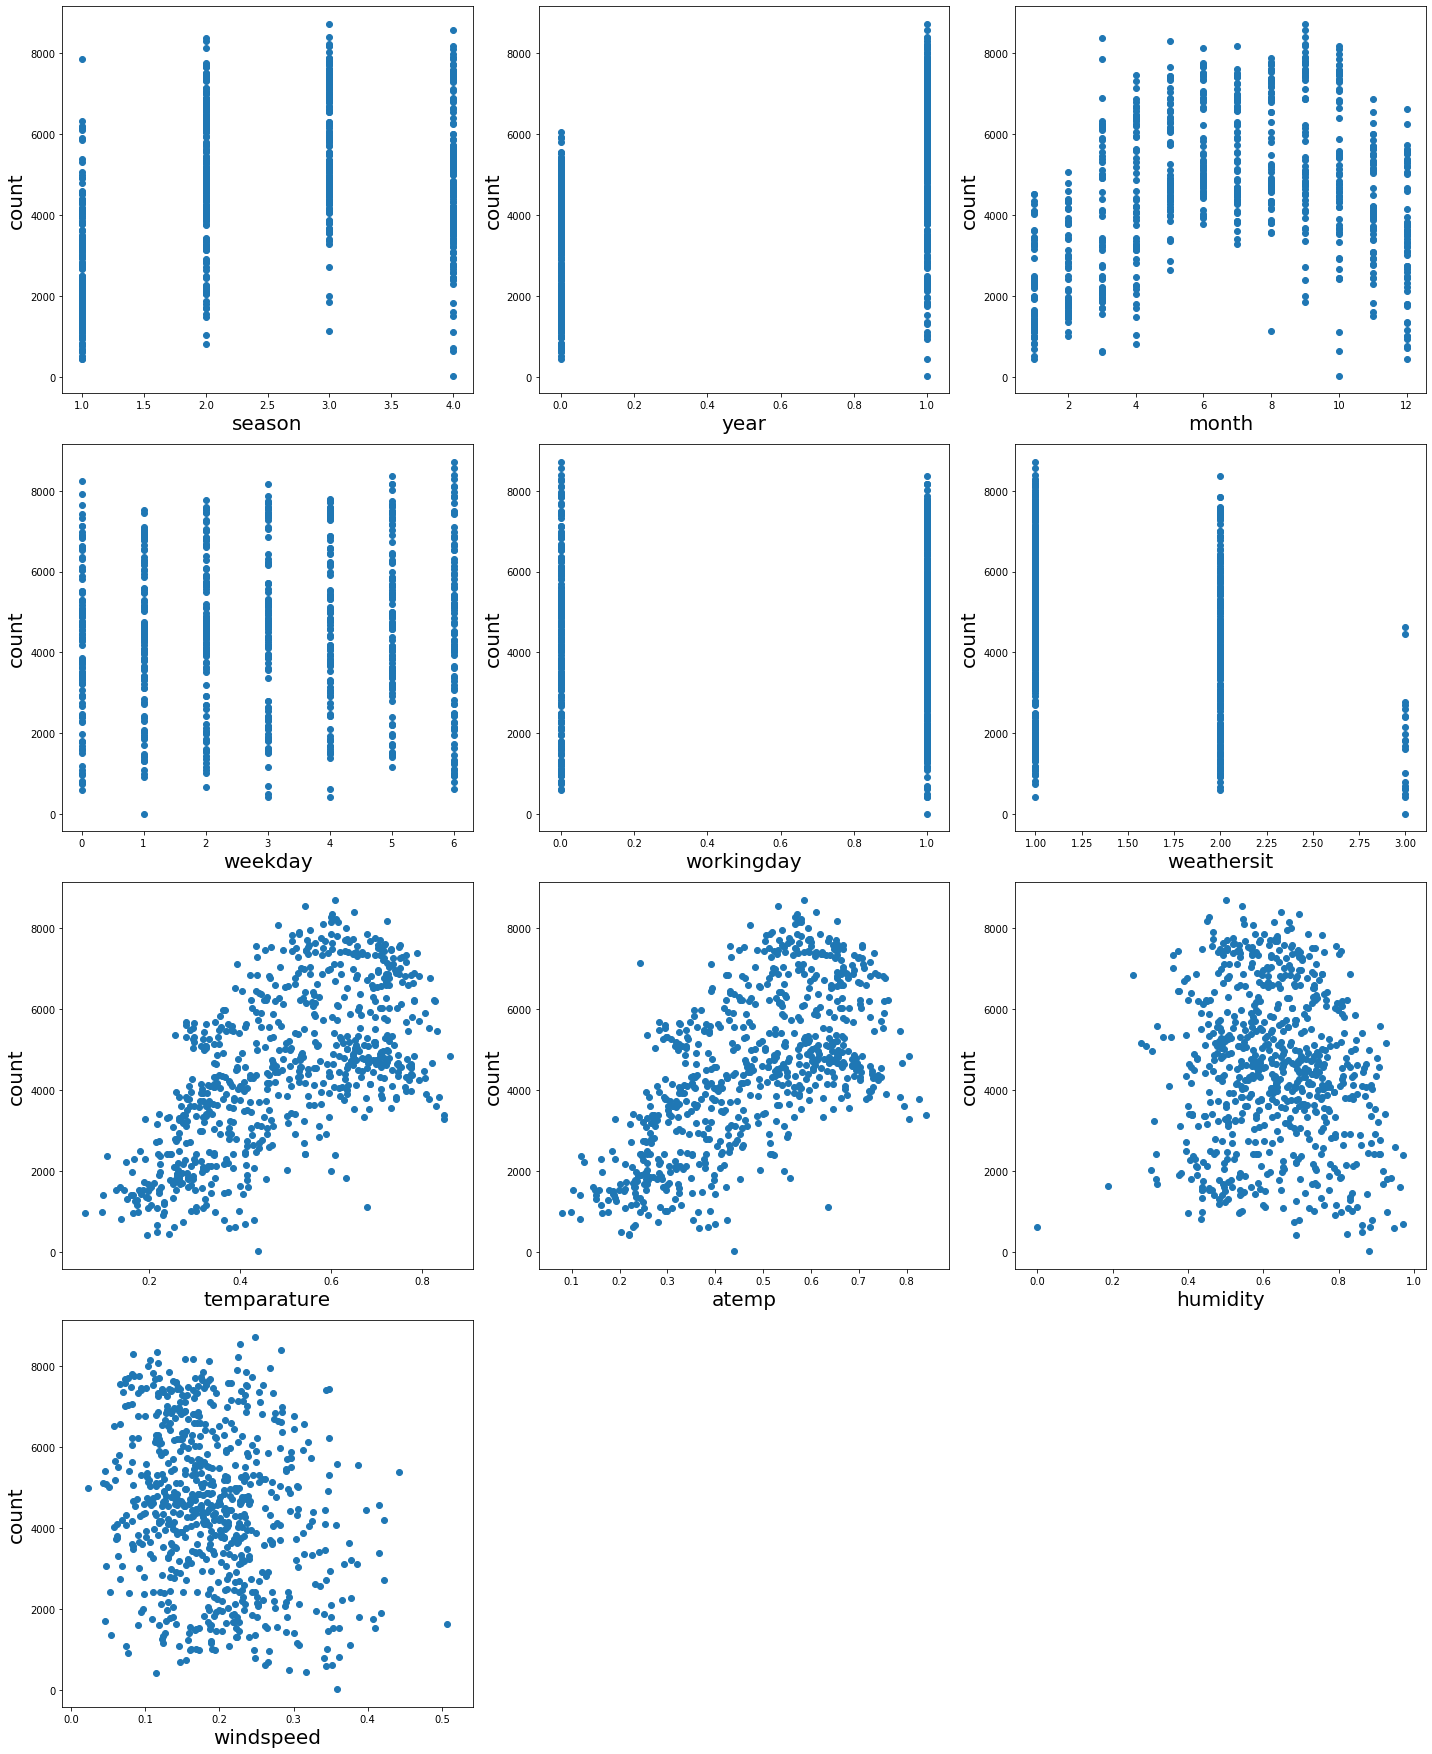

In [29]:
#the relationship between independent variables and dependent variable.

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# 5. Stats based EDA

# a. correlation

In [30]:
x.corr()

season      year     month   weekday  workingday  weathersit  \
season       1.000000 -0.001844  0.831440 -0.003080    0.012485    0.019211   
year        -0.001844  1.000000 -0.001792 -0.005461   -0.002013   -0.048727   
month        0.831440 -0.001792  1.000000  0.009509   -0.005901    0.043528   
weekday     -0.003080 -0.005461  0.009509  1.000000    0.035790    0.031087   
workingday   0.012485 -0.002013 -0.005901  0.035790    1.000000    0.061200   
weathersit   0.019211 -0.048727  0.043528  0.031087    0.061200    1.000000   
temparature  0.334315  0.047604  0.220205 -0.000170    0.052660   -0.120602   
atemp        0.342876  0.046106  0.227459 -0.007537    0.052182   -0.121583   
humidity     0.205445 -0.110651  0.222204 -0.052232    0.024327    0.591045   
windspeed   -0.229046 -0.011817 -0.207502  0.014282   -0.018796    0.039511   

             temparature     atemp  humidity  windspeed  
season          0.334315  0.342876  0.205445  -0.229046  
year            0.047604  0.046106 -0.110651  -0.011817  
month           0.220205  0.227459  0.222204  -0.207502  
weekday        -0.000170 -0.007537 -0.052232   0.014282  
workingday      0.052660  0.052182  0.024327  -0.018796  
weathersit     -0.120602 -0.121583  0.591045   0.039511  
temparature     1.000000  0.991702  0.126963  -0.157944  
atemp           0.991702  1.000000  0.139988  -0.183643  
humidity        0.126963  0.139988  1.000000  -0.248489  
windspeed      -0.157944 -0.183643 -0.248489   1.000000

In [38]:
x.columns

Index(['season', 'year', 'month', 'weekday', 'workingday', 'weathersit',
       'temparature', 'humidity', 'windspeed'],
      dtype='object')

# Standardization of the data

In [39]:
#Standardization of the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled 

array([[-1.34821315, -1.00136893, -1.60016072, ..., -0.82666213,
         1.25017133, -0.38789169],
       [-1.34821315, -1.00136893, -1.60016072, ..., -0.72109471,
         0.47911298,  0.74960172],
       [-1.34821315, -1.00136893, -1.60016072, ..., -1.63465665,
        -1.33927398,  0.74663186],
       ...,
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.32322427,
         0.87839173, -0.85355213],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.30955752,
        -1.01566357,  2.06944426],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.52822548,
        -0.35406086, -0.46020122]])

# b. VIF (Variance Inflation Factor)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] =x.columns

vif

VIF     Features
0  3.536145       season
1  1.020213         year
2  3.324908        month
3  1.011912      weekday
4  1.010611   workingday
5  1.741267   weathersit
6  1.215450  temparature
7  1.904989     humidity
8  1.165205    windspeed

In [55]:
#Droping the atemp variable even though temparature also given higehst vif but it seems to be important feature 
#when we are going to predict predict based an seasonal and environmental features.
#x = x.drop(columns=['atemp'])
if('atemp' in x.columns):
    x = x.drop(columns=['atemp'])
else:
    pass


In [56]:
x.head()

season  year  month  weekday  workingday  weathersit  temparature  \
0       1     0      1        6           0           2     0.344167   
1       1     0      1        0           0           2     0.363478   
2       1     0      1        1           1           1     0.196364   
3       1     0      1        2           1           1     0.200000   
4       1     0      1        3           1           1     0.226957   

   humidity  windspeed  
0  0.805833   0.160446  
1  0.696087   0.248539  
2  0.437273   0.248309  
3  0.590435   0.160296  
4  0.436957   0.186900

# Randomized train and test split

In [57]:
#train and test split with standardized data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state=355)
x_train,x_test,y_train,y_test

(array([[ 0.45351228,  0.99863295,  0.13919614, ...,  1.17779052,
          0.38950536, -0.12281272],
        [ 0.45351228,  0.99863295,  0.13919614, ...,  1.56501868,
         -1.27035044,  0.06173153],
        [ 0.45351228,  0.99863295,  0.42908895, ...,  1.0001228 ,
         -0.17256221, -0.1629445 ],
        ...,
        [-0.44735043,  0.99863295, -0.44058948, ...,  0.77234732,
          0.49197028, -0.87771126],
        [ 1.354375  , -1.00136893,  1.58866019, ..., -1.16377706,
         -0.2662378 , -0.64479711],
        [ 1.354375  ,  0.99863295,  1.00887457, ...,  0.88623506,
          0.66761639, -0.94183431]]),
 array([[ 0.45351228, -1.00136893,  0.42908895, ...,  1.5741262 ,
         -0.96003996,  0.19838362],
        [ 0.45351228,  0.99863295,  0.13919614, ...,  1.56045945,
         -0.95418743, -0.82961251],
        [-0.44735043, -1.00136893, -0.44058948, ...,  0.66301334,
          0.48611072,  1.96502155],
        ...,
        [-1.34821315, -1.00136893, -1.60016072, ..., -

In [58]:
#Standardization of the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled 

array([[-1.34821315, -1.00136893, -1.60016072, ..., -0.82666213,
         1.25017133, -0.38789169],
       [-1.34821315, -1.00136893, -1.60016072, ..., -0.72109471,
         0.47911298,  0.74960172],
       [-1.34821315, -1.00136893, -1.60016072, ..., -1.63465665,
        -1.33927398,  0.74663186],
       ...,
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.32322427,
         0.87839173, -0.85355213],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.30955752,
        -1.01566357,  2.06944426],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.52822548,
        -0.35406086, -0.46020122]])

# PCA

In [59]:
from sklearn.decomposition import PCA
pca = PCA( n_components=5)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance.sum()

0.7606368999269799

# c. OLS: ordinary least squares 

In [60]:
#ols model with standardised data
import statsmodels.api as sma
from sklearn.metrics import r2_score
x_train = sma.add_constant(x_train)
x_test = sma.add_constant(x_test)

lm = sma.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     302.1
Date:                Sun, 23 Aug 2020   Prob (F-statistic):          1.29e-158
Time:                        17:17:16   Log-Likelihood:                -4869.8
No. Observations:                 584   AIC:                             9752.
Df Residuals:                     578   BIC:                             9778.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4523.8750     42.094    107.470      0.000    4441.199    4606.551
x1          -436.3127     28.170    -15.488      0.000    -491.642    -380.984
x2          -827.7590     33.383    -24.796      0.000    -893.326    -762.192
x3          -114.4529     40.888     -2.799      0.005    -194.760     -34.146
x4          -939.6874     41.112    -22.857      0.000   -1020.435    -858.940
x5           483.5891     43.119     11.215      0.000     398.900     568.278
==============================================================================
Omnibus:                       25.709   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.010
Skew:                          -0.203   Prob(JB):                     2.53e-13
Kurtosis:                       4.490   Cond. No.                         1.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
##
#Predicting the Train set results
y_pred_trn = lm.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = lm.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)

#print("Train adjusted R2 score:",adj_r2_trn)
#print("Test adjusted R2 score:",adj_r2_ts)

Train Mean Squared Error: 1024173.5178436122
Test Mean Squared Error: 2923760.3767044605
Train Root mean squared Error: 1012.0145838097454
Test Root mean squared Error: 1709.9006920591794
Train R score: 0.7232789722254029
Test R score: 0.2551031608826655


In [37]:
#7. Library based utils

In [38]:
# 8.Data Transformation and preproceessinng steps
# PCA

In [39]:
# no VIF criteria applied for bulding model

# Linear regression

In [63]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
regressor = LinearRegression()
regressor=regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[   0.         -436.31268728 -827.75897643 -114.45289546 -939.68738255
  483.58913566]
4523.875


In [64]:
# create a function to create adjusted R-Squared
# adj_r2

# Predicting to evaluation metrics

In [65]:

#Predicting the Train set results
y_pred_trn = regressor.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = regressor.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)

#print("Train adjusted R2 score:",adj_r2_trn)
#print("Test adjusted R2 score:",adj_r2_ts)

Train Mean Squared Error: 1024173.5178436119
Test Mean Squared Error: 2923760.3767044614
Train Root mean squared Error: 1012.0145838097452
Test Root mean squared Error: 1709.9006920591796
Train R score: 0.7232789722254029
Test R score: 0.2551031608826648


In [66]:
# saving the model to the local file system
import pickle 
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [67]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
#lr=loaded_model.predict(scaler.transform([["enter features]"]))
#lr

# Elastic Net Regularization: 

In [68]:
#elastic net is used when we have confusion with the data having correct correlation or not in the dataset
elasticCV = ElasticNetCV(alphas = None, cv =10)

en_lr = elasticCV.fit(x_train, y_train)

en_lr

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [69]:
#Predicting the Train set results
y_pred_trn = en_lr.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = en_lr.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 1673919.296627492
Test Mean Squared Error: 2562365.6697401144
Train Root mean squared Error: 1293.8003310509284
Test Root mean squared Error: 1600.7391010842816
Train R score: 0.5477244235432179
Test R score: 0.3471769768616988


# Decision tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(max_depth=10, random_state = 250)
dt = DTregressor.fit(x_train, y_train)

y_trn_predicted = dt.predict(x_train)
y_predicted = dt.predict(x_test)


# Need to  check prediction

In [71]:
#Predicting the Train set results
y_pred_trn = dt.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = dt.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 65756.19301836318
Test Mean Squared Error: 3957401.9929063083
Train Root mean squared Error: 256.42970385344046
Test Root mean squared Error: 1989.3219932696436
Train R score: 0.9822333608538346
Test R score: -0.008241393214053483


# Random forest

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor()
rf = rf1.fit(x_train,y_train);
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [73]:
#Predicting the Train set results
y_pred_trn = rf.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = rf.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 118230.4581857877
Test Mean Squared Error: 2704248.6898142854
Train Root mean squared Error: 343.8465619804678
Test Root mean squared Error: 1644.4599994570513
Train R score: 0.9680553604116637
Test R score: 0.3110289347650348


In [74]:
 # Set the parameters by cross-validation
tuned_parameters = {'n_estimators': [500, 700, 1000, 10000], 'max_depth': [1, 2, 3], 'min_samples_split': [1, 2, 3]}

from sklearn.model_selection import GridSearchCV
rf_tuned = GridSearchCV(rf1, tuned_parameters, cv=5,  n_jobs=-1, verbose=1)
rf_tuned=rf_tuned.fit(x_train, y_train)
rf_tuned

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 13.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [76]:
#Predicting the Train set results
y_pred_trn = rf_tuned.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = rf_tuned.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 1097270.1362391536
Test Mean Squared Error: 2578876.9323884165
Train Root mean squared Error: 1047.5066282554749
Test Root mean squared Error: 1605.888206690745
Train R score: 0.7035290265210358
Test R score: 0.3429703437003251


# Adaboost

In [53]:

from sklearn.ensemble import AdaBoostRegressor
adab = AdaBoostRegressor()
adab = adab.fit(x_train,y_train)

In [54]:
#Predicting the Train set results
y_pred_trn = adab.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = adab.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 531293.5183031259
Test Mean Squared Error: 2245855.0090773473
Train Root mean squared Error: 728.8988395539712
Test Root mean squared Error: 1498.6176994408372
Train R score: 0.8568453992622451
Test R score: 0.4170910350834941


# gradient boost

In [77]:

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm = gbm.fit(x_train,y_train)


In [78]:
#Predicting the Train set results
y_pred_trn = gbm.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = gbm.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 369544.1448931659
Test Mean Squared Error: 2591750.4591348
Train Root mean squared Error: 607.9014269543754
Test Root mean squared Error: 1609.8914432764714
Train R score: 0.9001530172365417
Test R score: 0.3396905094642232


# svm

In [57]:

from sklearn.svm import SVR

svr = SVR(kernel='linear', C=100, gamma='auto')
svr = svr.fit(x_train, y_train)
svr

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [58]:
#Predicting the Train set results
y_pred_trn = svr.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = svr.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 811964.1838918572
Test Mean Squared Error: 2294829.6845678356
Train Root mean squared Error: 901.0905525483314
Test Root mean squared Error: 1514.8695272424736
Train R score: 0.7812199762390516
Test R score: 0.40437971699666375


# multi layer perceptron regressor

In [79]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(activation='identity')
mlpr = mlpr.fit(x_train, y_train)

C:\Users\TousifAhamed Nadaf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [80]:
#Predicting the Train set results
y_pred_trn = mlpr.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = mlpr.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 22040578.304783706
Test Mean Squared Error: 21606872.990158536
Train Root mean squared Error: 4694.73942884839
Test Root mean squared Error: 4648.319372650564
Train R score: -4.955134920972976
Test R score: -4.504859947421646


#xgboost

In [81]:
#conda install -c anaconda py-xgboost

# Ann

In [82]:
#! pip install keras

In [83]:
#!pip install tensorflow

In [84]:
#!pip install theano

# KNN

In [85]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(x_train, y_train)  #fit the model
    pred=knn.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1955.5651983245048
RMSE value for k=  2 is: 1779.4737049663495
RMSE value for k=  3 is: 1696.1177773784545
RMSE value for k=  4 is: 1688.4211843208036
RMSE value for k=  5 is: 1673.6285554951276
RMSE value for k=  6 is: 1668.4083238892624
RMSE value for k=  7 is: 1669.6742602556544
RMSE value for k=  8 is: 1671.9688875983722
RMSE value for k=  9 is: 1667.6227952843465
RMSE value for k=  10 is: 1675.281405603006
RMSE value for k=  11 is: 1674.316010947316
RMSE value for k=  12 is: 1668.5352713017048
RMSE value for k=  13 is: 1665.20867714935
RMSE value for k=  14 is: 1677.1303405611848
RMSE value for k=  15 is: 1662.060268160039
RMSE value for k=  16 is: 1661.2444554643403
RMSE value for k=  17 is: 1648.2148101437178
RMSE value for k=  18 is: 1657.511102460162
RMSE value for k=  19 is: 1660.3100824948656
RMSE value for k=  20 is: 1664.8228832374393


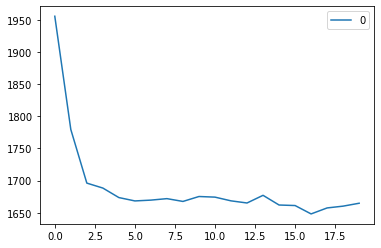

In [87]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [88]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_


{'n_neighbors': 9}

In [89]:
knn = neighbors.KNeighborsRegressor(n_neighbors =9)
knn=knn.fit(x_train,y_train)

In [90]:
#Predicting the Train set results
y_pred_trn = knn.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = knn.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 737878.1733468623
Test Mean Squared Error: 2780965.787351978
Train Root mean squared Error: 858.998354682279
Test Root mean squared Error: 1667.6227952843467
Train R score: 0.800632995343505
Test R score: 0.291483446729351


In [91]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_train = polynomial_features.fit_transform(x_train)
x_test = polynomial_features.fit_transform(x_test)
model = LinearRegression()
plr=model.fit(x_train, y_train)
plr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
#Predicting the Train set results
y_pred_trn = plr.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = plr.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 815840.4487786792
Test Mean Squared Error: 2689580.8472392256
Train Root mean squared Error: 903.2388658481649
Test Root mean squared Error: 1639.994160733271
Train R score: 0.7795683997361494
Test R score: 0.31476591323217895


In [3]:
#!pip install prettytable


In [1]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "Root Mean Squared Error","R² score"]
models = [
          regressor,
          en_lr,
          dt,
          rf_tuned,
          adab,
          gbm,
          svr,
          mlpr,
          knn,
          plr
]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_test)

    mse = mean_squared_error(y_test, y_res)
    score = model.score(x_test, y_test)    

    table.add_row([type(model).__name__, format(mse, '.2f'), format(rmse,'.2f'),format(score, '.2f')])

print(table)

ModuleNotFoundError: No module named 'prettytable'

In [83]:
# 9. ML Model.
#a.KNN
#b.Randomforest
#c.Xgboost


In [82]:
# 10. Model tuning and optimization

#Linear regression
#Decision tree
#Random forest
#Xg boost
#svm
##knn

#Model evaluation criteria
#RMSE, MSE, R2, adj-R2

In [ ]:
# 11. Testing modules

In [ ]:
#12. Prediction pipeline

In [ ]:
#13.Deployment Strategy

In [ ]:
#14. Monitoring

In [ ]:
#15. Loggining